# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from scipy.cluster.hierarchy import linkage, fcluster


In [2]:
# !pip install openpyxl
# !pip install imblearn

## Import Dataset

In [3]:
df=pd.read_csv(r"C:\Users\debab\Projects\HL_Scorecard\HL_SC.csv")
df.head()

prospect_no loan_disb_date  asset_cost  disb_amt  down_payment  roi  age  \
0            1     21-11-2015     1467032   1100274        366758   16   48   
1            2     05-11-2015     1113349    734810        378539   15   50   
2            3     01-12-2015     1660092    979454        680638   14   45   
3            4     06-10-2015     1061768    902503        159265   14   49   
4            5     31-01-2015     1212534    836648        375886   19   36   

   is_exist_cust  dist_from_off  is_expat  ...      locality  \
0              0           29.0         0  ...  Middle Class   
1              0           11.0         1  ...     Below Avg   
2              0           53.0         1  ...     Below Avg   
3              0            8.0         1  ...  Middle Class   
4              0           48.0         0  ...  Middle Class   

   accommodation_type  current_residence veh_own foir tenure vin_in_business  \
0           Apartment              Owned       2   40    240              28   
1               Villa             Rented       1   41    132              21   
2               Villa             Rented       2   34    156              50   
3           Apartment              Owned       2   41    120              19   
4           Apartment              Owned       2   45    108              75   

  ltv target    random  
0  75      0  0.622896  
1  66      0  0.107378  
2  59      0  0.110078  
3  85      0  0.144848  
4  69      0  0.266234  

[5 rows x 27 columns]

# EDA

In [4]:
df["target"].sum()

1399

In [5]:
df[df['marital_status'].isnull() & df['target']==1].shape

(64, 27)

In [6]:
df[df['dist_from_off'].isnull() & df['target']==1].shape

(16, 27)

In [7]:
df.shape

(20000, 27)

In [8]:
df.describe()

prospect_no    asset_cost      disb_amt  down_payment           roi  \
count  20000.000000  2.000000e+04  2.000000e+04  2.000000e+04  20000.000000   
mean   10000.500000  1.177247e+06  7.828082e+05  3.944387e+05     15.082650   
std     5773.647028  3.331986e+05  2.743219e+05  2.081830e+05      3.052095   
min        1.000000  3.011490e+05  1.301110e+05  1.733000e+04      8.000000   
25%     5000.750000  9.762760e+05  5.996938e+05  2.400205e+05     12.000000   
50%    10000.500000  1.188824e+06  7.849550e+05  3.685615e+05     15.000000   
75%    15000.250000  1.385452e+06  9.489295e+05  5.280715e+05     18.000000   
max    20000.000000  1.999756e+06  1.880934e+06  1.197307e+06     20.000000   

                age  is_exist_cust  dist_from_off      is_expat      children  \
count  20000.000000   20000.000000   19816.000000  20000.000000  20000.000000   
mean      45.015150       0.183000      23.180662      0.500000      2.095550   
std        8.019479       0.386676      18.144472      0.500013      1.515399   
min       20.000000       0.000000       0.000000      0.000000      0.000000   
25%       42.000000       0.000000       8.000000      0.000000      1.000000   
50%       46.000000       0.000000      19.000000      0.500000      2.000000   
75%       50.000000       0.000000      36.000000      1.000000      3.000000   
max       60.000000       1.000000      68.000000      1.000000      7.000000   

       earning_members  yrs_in_curr_resi       veh_own          foir  \
count     20000.000000      20000.000000  20000.000000  20000.000000   
mean          1.872300          4.699200      1.614000     44.559200   
std           1.043526          3.836086      0.631129      8.673082   
min           1.000000          0.000000      0.000000     26.000000   
25%           1.000000          2.000000      1.000000     39.000000   
50%           1.000000          4.000000      2.000000     45.000000   
75%           3.000000          6.000000      2.000000     51.000000   
max           4.000000         20.000000      2.000000     66.000000   

            tenure  vin_in_business           ltv        target        random  
count  20000.00000     20000.000000  20000.000000  20000.000000  20000.000000  
mean     149.43360        38.860050     66.422200      0.069950      0.496697  
std       57.14118        23.238809     14.024621      0.255069      0.289432  
min       60.00000         0.000000     40.000000      0.000000      0.000015  
25%       96.00000        19.000000     55.000000      0.000000      0.245442  
50%      144.00000        34.000000     66.000000      0.000000      0.493315  
75%      180.00000        59.000000     76.000000      0.000000      0.748548  
max      240.00000       200.000000     95.000000      1.000000      0.999991

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   prospect_no         20000 non-null  int64  
 1   loan_disb_date      20000 non-null  object 
 2   asset_cost          20000 non-null  int64  
 3   disb_amt            20000 non-null  int64  
 4   down_payment        20000 non-null  int64  
 5   roi                 20000 non-null  int64  
 6   age                 20000 non-null  int64  
 7   is_exist_cust       20000 non-null  int64  
 8   dist_from_off       19816 non-null  float64
 9   is_expat            20000 non-null  int64  
 10  children            20000 non-null  int64  
 11  earning_members     20000 non-null  int64  
 12  yrs_in_curr_resi    20000 non-null  int64  
 13  source_type         20000 non-null  object 
 14  marital_status      19025 non-null  object 
 15  gender              20000 non-null  object 
 16  appl

In [10]:
df.isnull().sum()

prospect_no             0
loan_disb_date          0
asset_cost              0
disb_amt                0
down_payment            0
roi                     0
age                     0
is_exist_cust           0
dist_from_off         184
is_expat                0
children                0
earning_members         0
yrs_in_curr_resi        0
source_type             0
marital_status        975
gender                  0
applicant_type          0
locality                0
accommodation_type      0
current_residence       0
veh_own                 0
foir                    0
tenure                  0
vin_in_business         0
ltv                     0
target                  0
random                  0
dtype: int64

### Imputation

In [11]:
# Median Imputation
df['dist_from_off']=df['dist_from_off'].fillna(df['dist_from_off'].median())

### Data splitting

In [12]:
dev, val, holdout = np.split(df.sample(frac=1, random_state=50),
                            [int(.5*len(df)),
                            int(.8*len(df))])
(len(dev),len(val),len(holdout))

(10000, 6000, 4000)

In [13]:
# Default rate distribution checking across all the samples
print("popln default rate:", round(sum(df.target)*100/len(df),2),'%')
print("dev default rate:", round(sum(dev.target)*100/len(dev),2),'%')
print("val default rate:", round(sum(val.target)*100/len(val),2),'%')
print("holdout default rate:", round(sum(holdout.target)*100/len(holdout),2),'%')


popln default rate: 7.0 %
dev default rate: 6.89 %
val default rate: 7.12 %
holdout default rate: 7.08 %


#### Correlation with target variable

In [14]:
correlation_matrix = df.corr()

# Select features with high correlation to target variable
target_correlation = correlation_matrix['target'].sort_values(ascending=False)
print("Features correlated with target:")
print(target_correlation)

Features correlated with target:
target              1.000000
ltv                 0.124744
disb_amt            0.122108
dist_from_off       0.069168
asset_cost          0.051620
age                 0.035465
yrs_in_curr_resi    0.033054
tenure              0.025011
foir                0.024223
children            0.011167
veh_own             0.007770
random              0.006752
prospect_no         0.004207
is_expat           -0.000196
roi                -0.023035
is_exist_cust      -0.030934
earning_members    -0.037825
down_payment       -0.078284
vin_in_business    -0.083363
Name: target, dtype: float64


C:\Users\debab\AppData\Local\Temp\ipykernel_7888\490194246.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


### Multicolinearity

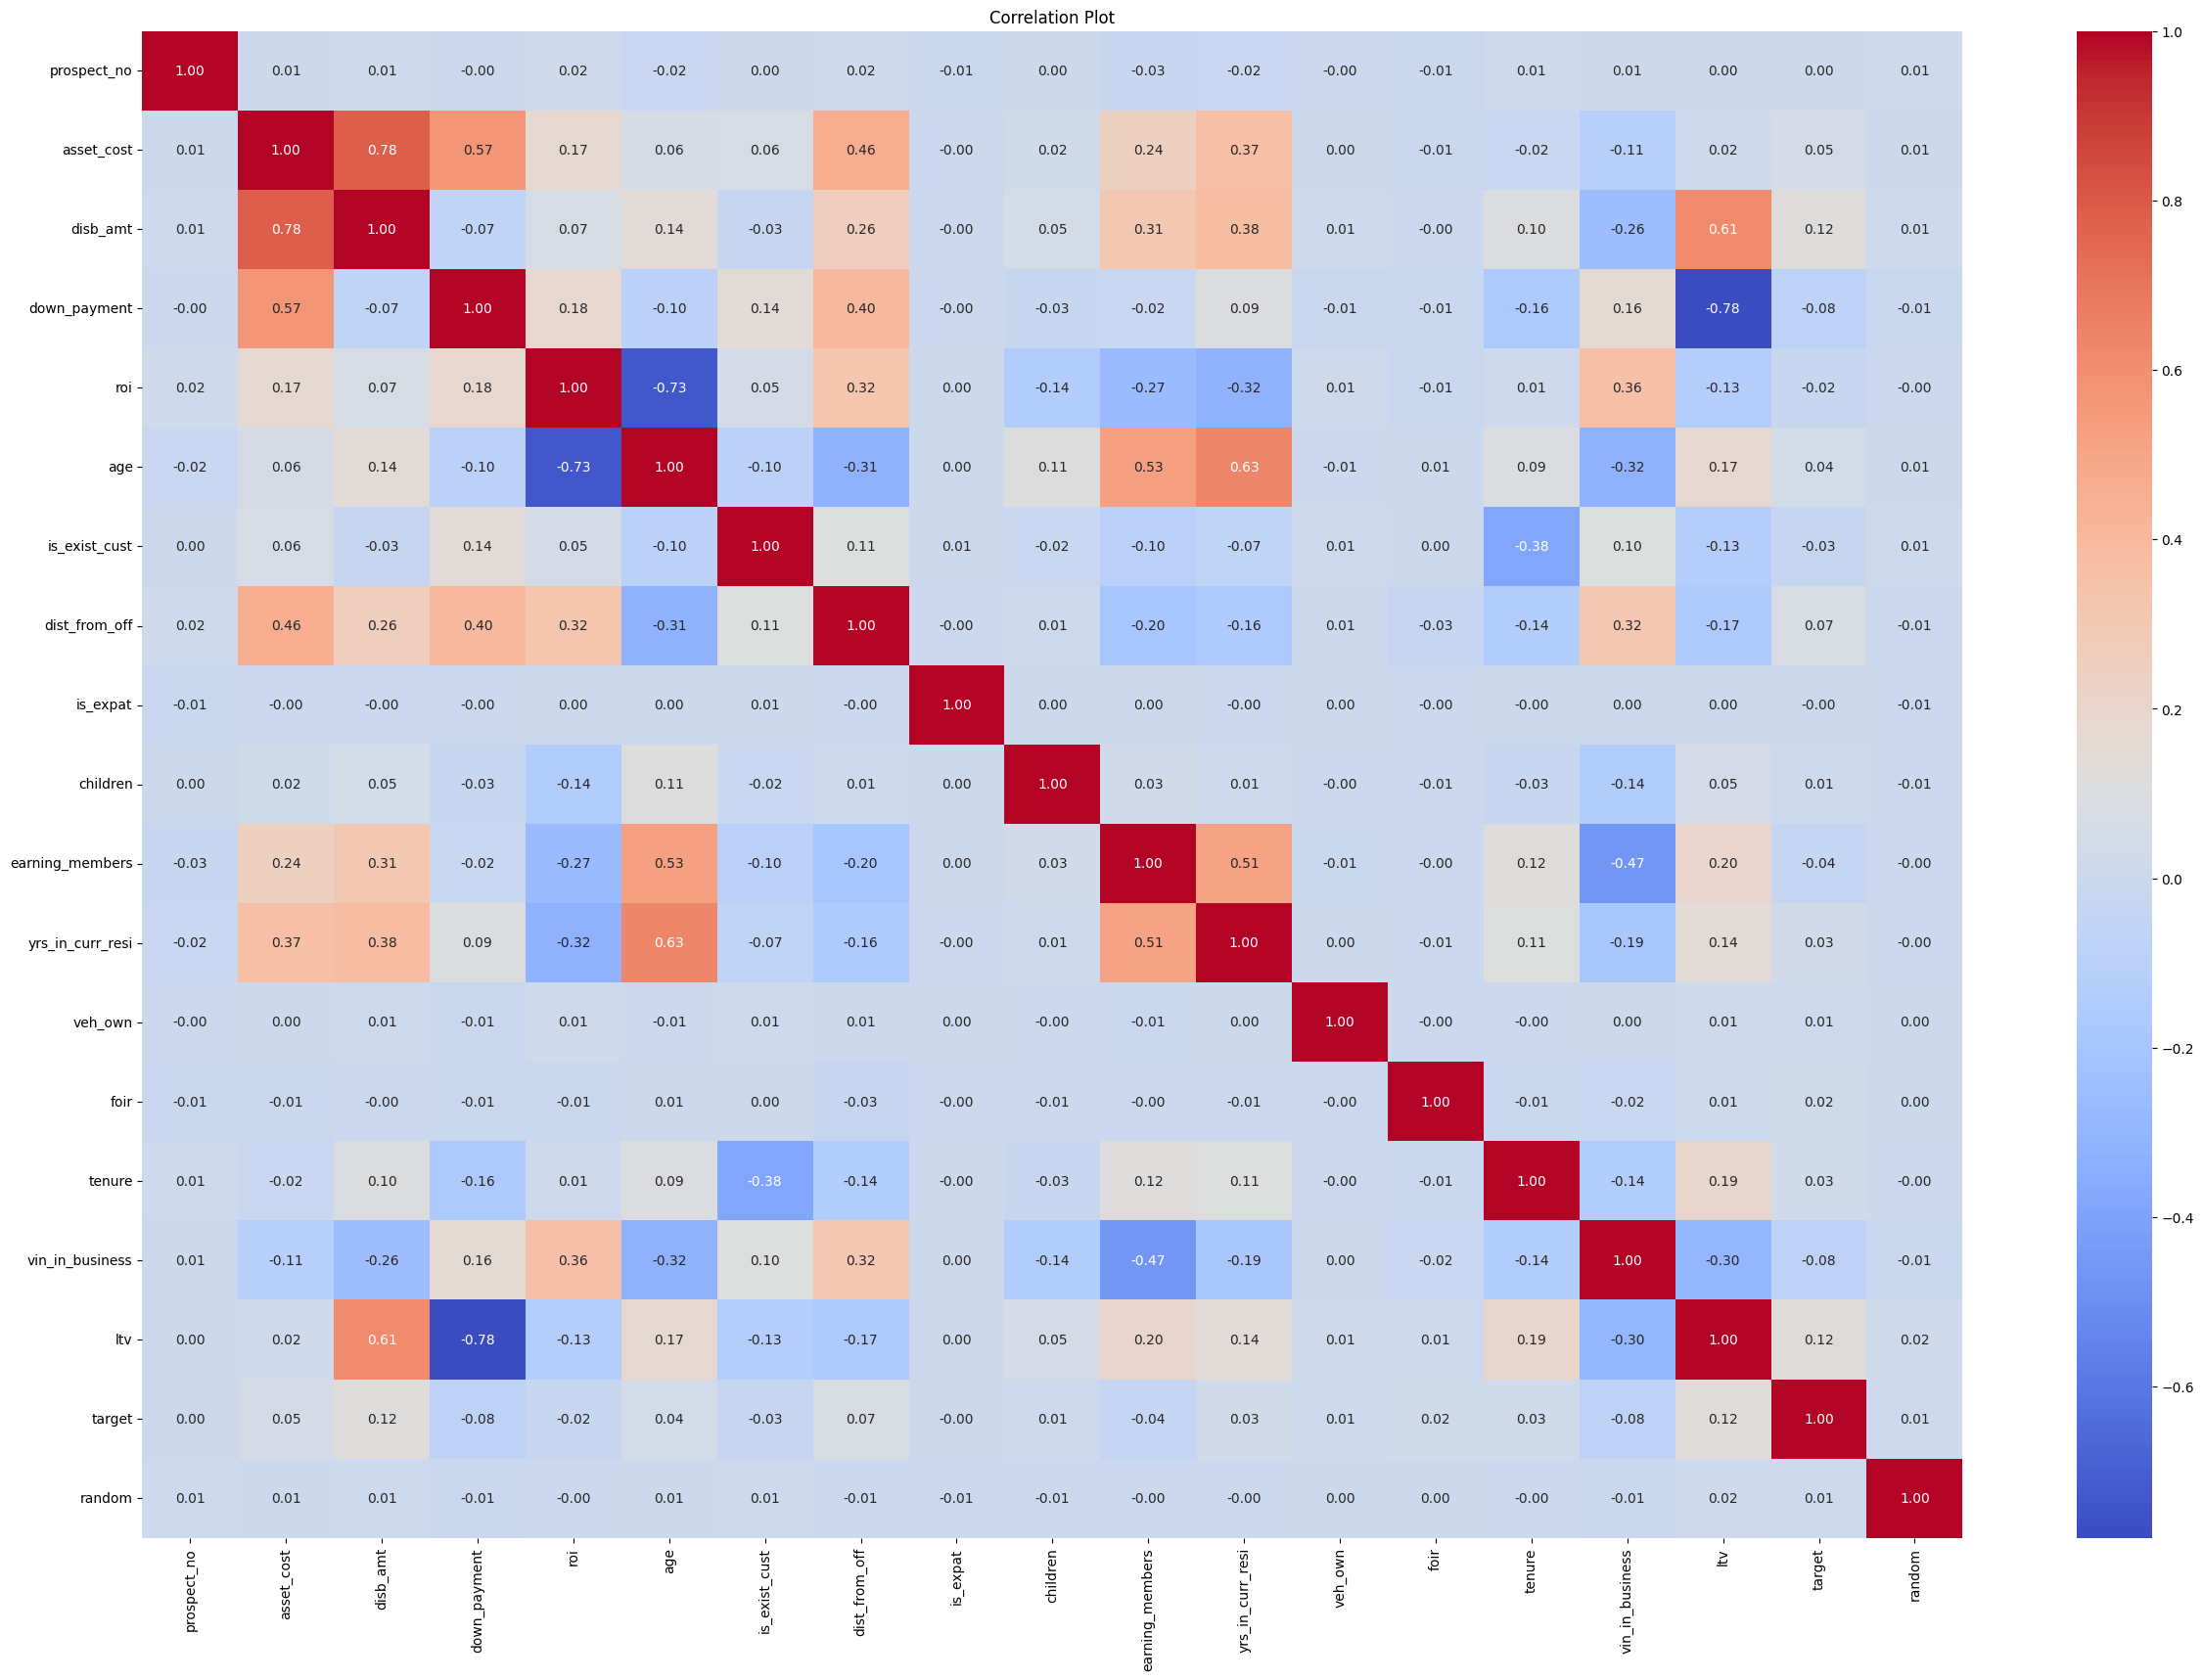

In [15]:
# checking multicolinearity using heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot')
plt.show()

Observations:

1. asset_cost & disb_amt highly +ve correlation (0.78)
2. ltv & down_payment highly -ve correlation (-0.78)
3. age & roi highly -ve correlation (-0.73)
4. yrs_in_curr_resi & age +ve correlation (0.63)
5. ltv & disb_amt +ve correlation (0.61)
6. down_payment & asset_cost +ve correlation (0.57)
7. earning_members & age +ve correlation (0.53)

### WOE & IV 

In [16]:
# df["is_exist_cust"]=df["is_exist_cust"].astype(str)

In [17]:
# df["is_expat"]=df["is_expat"].astype(str)

In [18]:
def calculate_woe_iv(data, feature, target, bins=20, method='quantile'):
    data["is_exist_cust"]=data["is_exist_cust"].astype(str)
    data["is_expat"]=data["is_expat"].astype(str)
    # Bin the continuous variable if it's numeric
    if pd.api.types.is_numeric_dtype(data[feature]):
        if method == 'quantile':
            data[feature + '_binned'] = pd.qcut(data[feature], q=bins, duplicates='drop')
        elif method == 'uniform':
            data[feature + '_binned'] = pd.cut(data[feature], bins=bins)
        else:
            raise ValueError("Invalid binning method. Use 'quantile' or 'uniform'.")
        binned_feature = feature + '_binned'
    else:
        binned_feature = feature  # For categorical variables, use the feature as-is

    # Create a dataframe for the binned feature and target
    df = pd.DataFrame({binned_feature: data[binned_feature], target: data[target]})
    
    # Calculate the total bad_events (1) and good_events (0)
    total_bad_events = df[target].sum()
    total_good_events = df.shape[0] - total_bad_events

    # Calculate WOE and IV
    grouped = df.groupby(binned_feature)[target].agg(count='count', bad_events='sum')
    grouped['good_events'] = grouped['count'] - grouped['bad_events']
    
    # Calculate bad_event and good_event distribution
    grouped['bad_events_dist'] = grouped['bad_events'] / total_bad_events
    grouped['good_events_dist'] = grouped['good_events'] / total_good_events

    # Calculate WOE
    grouped['woe'] = np.log(grouped['good_events_dist'] / grouped['bad_events_dist'])
    
    # Calculate IV for each bin
    grouped['iv'] = (grouped['good_events_dist'] - grouped['bad_events_dist']) * grouped['woe']
    
    # Sum up the IV
    iv = grouped['iv'].sum()
    
    return grouped[['count', 'bad_events', 'good_events', 'bad_events_dist', 'good_events_dist', 'woe', 'iv']], iv


In [19]:
# calculate_woe_iv(dev,"is_exist_cust","target")

In [20]:
iv_values = []
feature_df = {}

# Loop through all features
for feature in dev.columns:
    if feature not in ['target', "prospect_no", "loan_disb_date"]:  # Exclude target column
        woe_iv_df, iv = calculate_woe_iv(dev, feature, 'target', bins=20, method='quantile')
        iv_values.append((feature, iv))
        feature_df[feature]=woe_iv_df
        print(f"WOE and IV for {feature}:\n", woe_iv_df)
        print(f"Information Value (IV) for {feature}: {iv}\n")        

# Summary of IV values for each feature
iv_df = pd.DataFrame(iv_values, columns=['Feature', 'IV']).sort_values(by='IV', ascending=False)
print("IV Values Summary:")
print(iv_df)

WOE and IV for asset_cost:
                          count  bad_events  good_events  bad_events_dist  \
asset_cost_binned                                                          
(302348.999, 560563.85]    500          20          480         0.029028   
(560563.85, 712305.1]      500          23          477         0.033382   
(712305.1, 821229.0]       500          29          471         0.042090   
(821229.0, 910218.6]       500          29          471         0.042090   
(910218.6, 974059.5]       500          33          467         0.047896   
(974059.5, 1032949.8]      500          27          473         0.039187   
(1032949.8, 1083702.8]     500          38          462         0.055152   
(1083702.8, 1123266.6]     500          31          469         0.044993   
(1123266.6, 1155158.45]    500          41          459         0.059507   
(1155158.45, 1187492.0]    500          21          479         0.030479   
(1187492.0, 1221176.8]     500          34          466     

WOE and IV for earning_members:
                         count  bad_events  good_events  bad_events_dist  \
earning_members_binned                                                    
(0.999, 2.0]             7395         539         6856         0.782293   
(2.0, 3.0]               1427         103         1324         0.149492   
(3.0, 4.0]               1178          47         1131         0.068215   

                        good_events_dist       woe        iv  
earning_members_binned                                        
(0.999, 2.0]                    0.736333 -0.060547  0.002783  
(2.0, 3.0]                      0.142197 -0.050027  0.000365  
(3.0, 4.0]                      0.121469  0.576999  0.030728  
Information Value (IV) for earning_members: 0.03387540706854368

WOE and IV for yrs_in_curr_resi:
                          count  bad_events  good_events  bad_events_dist  \
yrs_in_curr_resi_binned                                                    
(-0.001, 1.0]            

In [21]:
# # Save all WOE/IV DataFrames to a single Excel file with each feature in a separate sheet
# with pd.ExcelWriter('woe_iv_output.xlsx') as writer:
#     for feature, df in feature_df.items():
#         df.to_excel(writer, sheet_name=feature, index=True)  # Each feature gets its own sheet
# #     print("WOE/IV data saved to 'woe_iv_output.xlsx'")
#     #Save the IV values summary to a separate sheet
#     iv_df.to_excel(writer, sheet_name='IV_Summary', index=False)
#     print("WOE/IV data and IV summary saved to 'woe_iv_output.xlsx'")

### Dimensionality reduction
Selected features based on their IV values

In [22]:
new_df = df[['ltv','disb_amt','vin_in_business','down_payment','dist_from_off','asset_cost','tenure','yrs_in_curr_resi','age','earning_members','roi','foir','target']]

In [23]:
new_df.head()

ltv  disb_amt  vin_in_business  down_payment  dist_from_off  asset_cost  \
0   75   1100274               28        366758           29.0     1467032   
1   66    734810               21        378539           11.0     1113349   
2   59    979454               50        680638           53.0     1660092   
3   85    902503               19        159265            8.0     1061768   
4   69    836648               75        375886           48.0     1212534   

   tenure  yrs_in_curr_resi  age  earning_members  roi  foir  target  
0     240                 8   48                4   16    40       0  
1     132                 5   50                3   15    41       0  
2     156                 5   45                2   14    34       0  
3     120                 4   49                2   14    41       0  
4     108                 5   36                1   19    45       0

In [24]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ltv               20000 non-null  int64  
 1   disb_amt          20000 non-null  int64  
 2   vin_in_business   20000 non-null  int64  
 3   down_payment      20000 non-null  int64  
 4   dist_from_off     20000 non-null  float64
 5   asset_cost        20000 non-null  int64  
 6   tenure            20000 non-null  int64  
 7   yrs_in_curr_resi  20000 non-null  int64  
 8   age               20000 non-null  int64  
 9   earning_members   20000 non-null  int64  
 10  roi               20000 non-null  int64  
 11  foir              20000 non-null  int64  
 12  target            20000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 2.0 MB


In [25]:
new_df.columns

Index(['ltv', 'disb_amt', 'vin_in_business', 'down_payment', 'dist_from_off',
       'asset_cost', 'tenure', 'yrs_in_curr_resi', 'age', 'earning_members',
       'roi', 'foir', 'target'],
      dtype='object')

#### Check the VIF score for reduced dimension

In [26]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(new_df), columns=new_df.columns)

# Calculating VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = df_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(df_scaled.values, i) for i in range(df_scaled.shape[1])]

# Display VIF scores
print(vif_data)

C:\Users\debab\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


            Variable        VIF
0                ltv  13.299549
1           disb_amt        inf
2    vin_in_business   1.725273
3       down_payment        inf
4      dist_from_off   1.838938
5         asset_cost        inf
6             tenure   1.085106
7   yrs_in_curr_resi   2.308531
8                age   3.928814
9    earning_members   1.883327
10               roi   2.777928
11              foir   1.002276
12            target   1.051200


In [27]:
# sns.pairplot(new_df, hue="target", palette="coolwarm", height=3)
# plt.show()

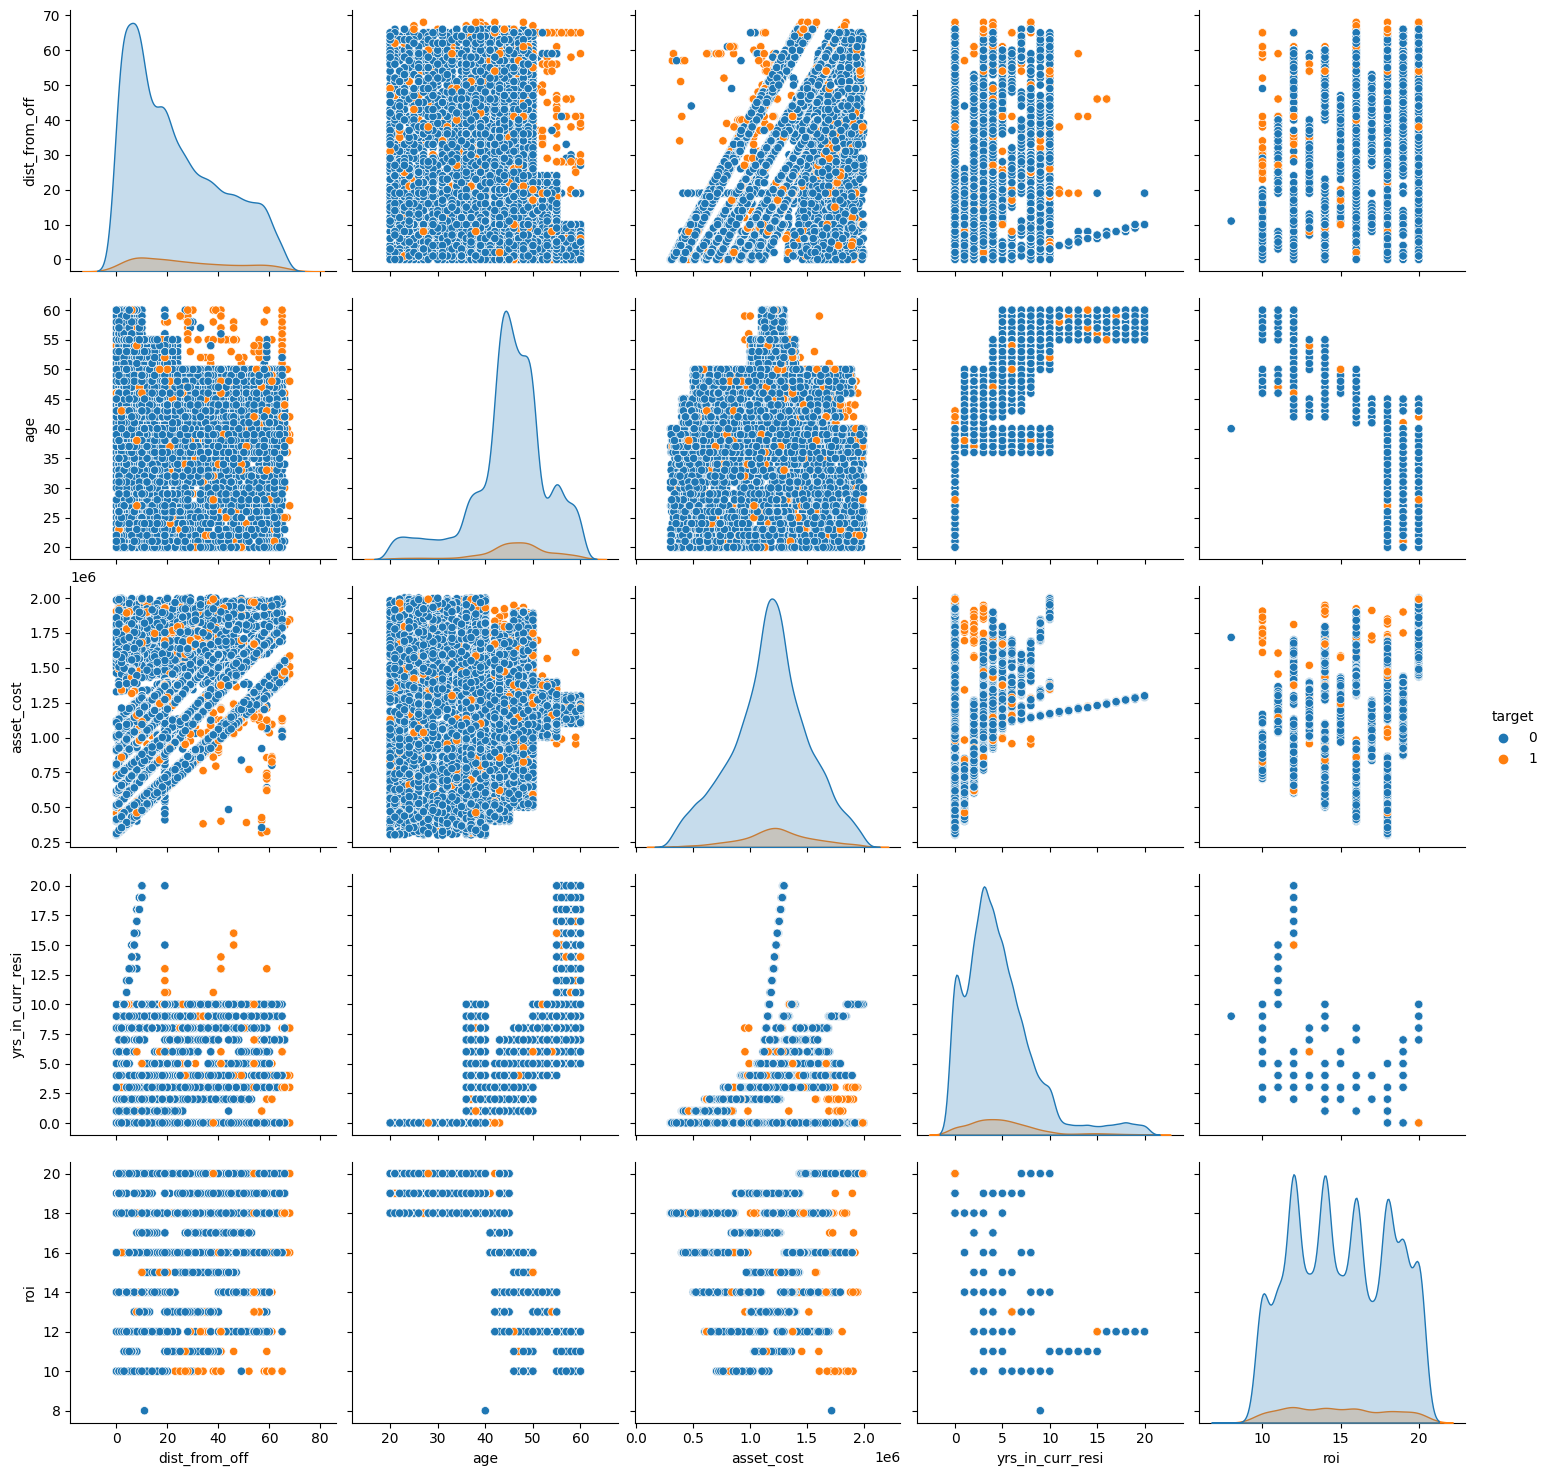

In [28]:
sns.pairplot(new_df[['dist_from_off','age','asset_cost','yrs_in_curr_resi', "roi", 'target']], hue="target", height=3)
plt.savefig('pairplot.png')
# plt.legend()
plt.show()

INSIGHTS:

1. dist_from_off>25 & age>50 high chance of default
2. dist_from_off>25 & asset_cost<1.25
3. dist_from_off>25 & yrs_in_curr_resi>10
4. yrs_in_curr_resi<2.5 & asset_cost>1.5
5. as the ltv increases with dist_from_off and asset_cost, default precentage is also increases.
6. roi, vin_in_business potentially have outliers.
7. for age>45, roi<17 and for 20<age<45, roi>17

In [29]:
fig=px.scatter_3d(new_df,x='dist_from_off',y='asset_cost',z='yrs_in_curr_resi',
                  color='target',width=600,height=500,
                  color_discrete_sequence=['white','#4A235A','#C39BD3'])


fig.update_layout(title='The relationship between (ltv, disb_amt and down_payment) and their effect on target',
                  titlefont={'size': 20,'family': 'Serif'},
                  showlegend=True)



fig.show()

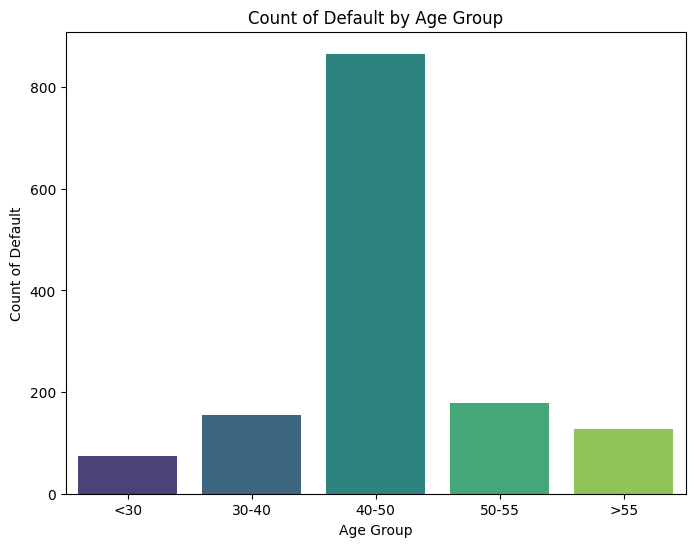

In [30]:
target_1_df = new_df[new_df['target'] == 1]

# Plot age groups without creating a new column
plt.figure(figsize=(8, 6))
sns.countplot(
    data=target_1_df, 
    x=pd.cut(target_1_df['age'], bins=[0, 30, 40, 50, 55, float('inf')], labels=['<30', '30-40', '40-50', '50-55', '>55']), 
    palette="viridis"
)
plt.title("Count of Default by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count of Default")
plt.savefig('default_acc_age.png')
plt.show()

INSIGHT:
    age group between 45 to 55 there is higher defaulter

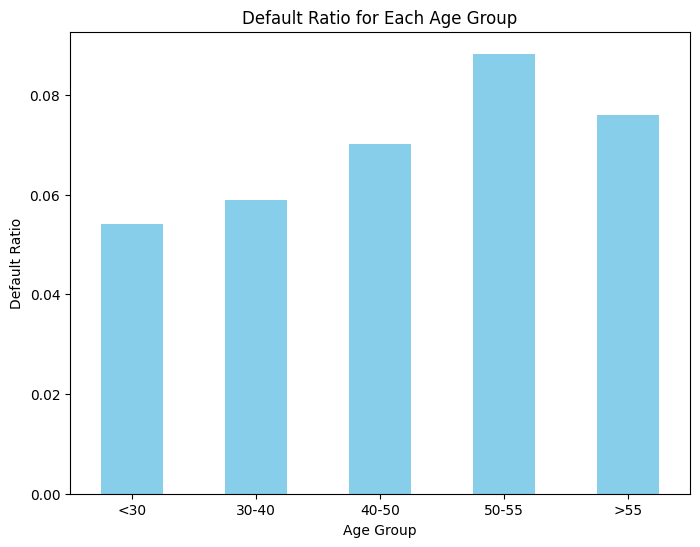

In [31]:
age_groups = pd.cut(new_df['age'], bins=[0, 30, 40, 50, 55, 100], labels=['<30', '30-40', '40-50', '50-55', '>55'])

# Calculate the ratio of target = 1 for each age group
age_group_ratio = new_df.groupby(age_groups)['target'].mean()

# Plot the barplot
plt.figure(figsize=(8, 6))
age_group_ratio.plot(kind='bar', color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Default Ratio')
plt.title('Default Ratio for Each Age Group')
plt.xticks(rotation=0)
plt.savefig('default_ratio_age.png')
plt.show()

INSIGHT: 
Above age 45 default ratio is higher and above 55 default ratio is much higher

### Outlier Detection

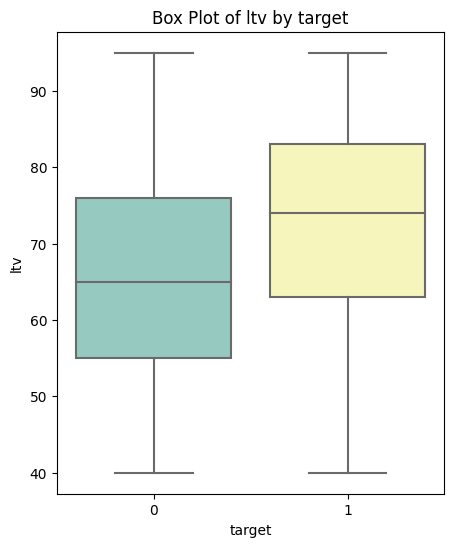

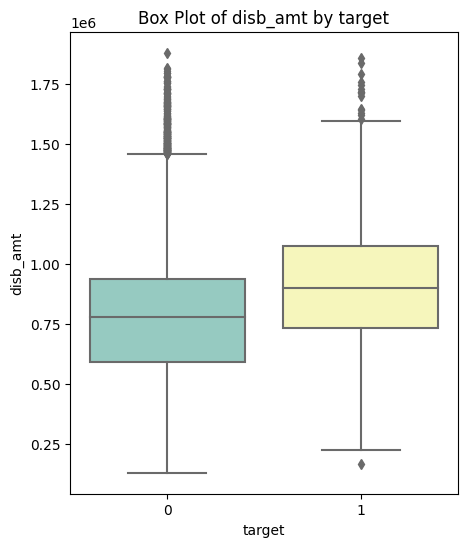

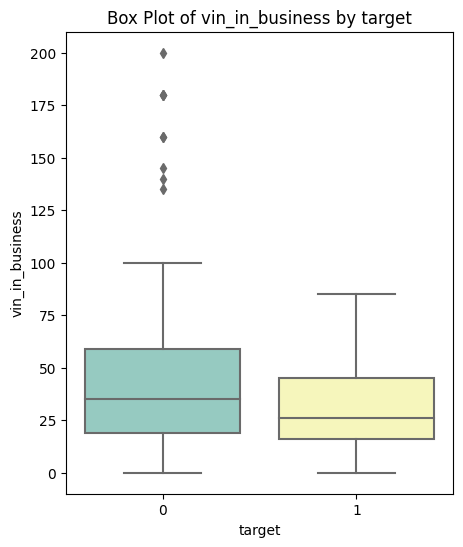

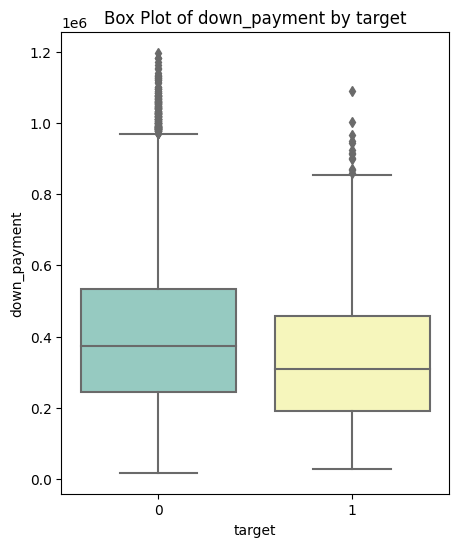

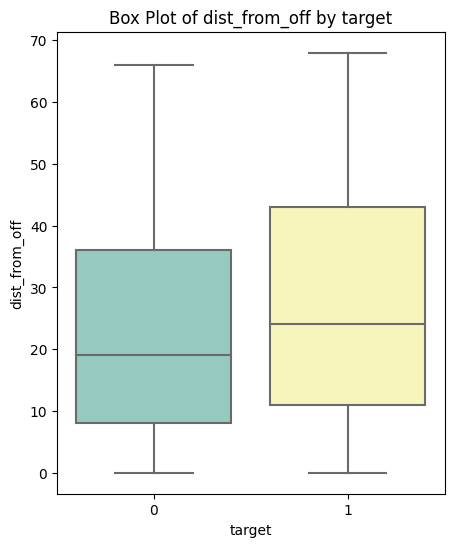

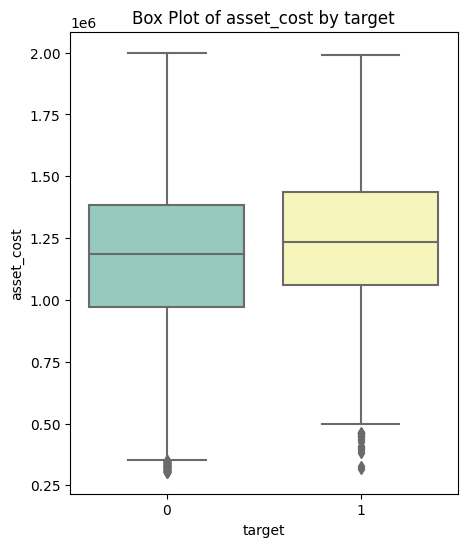

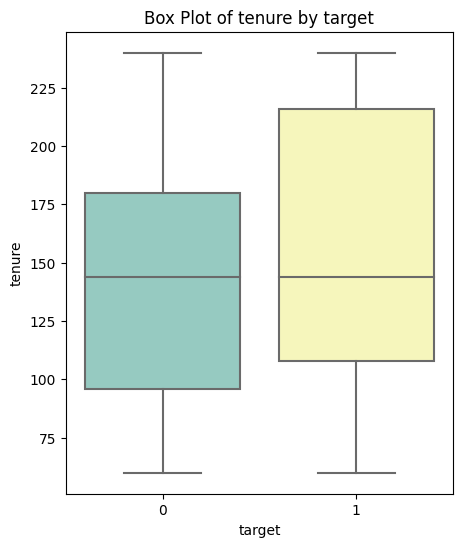

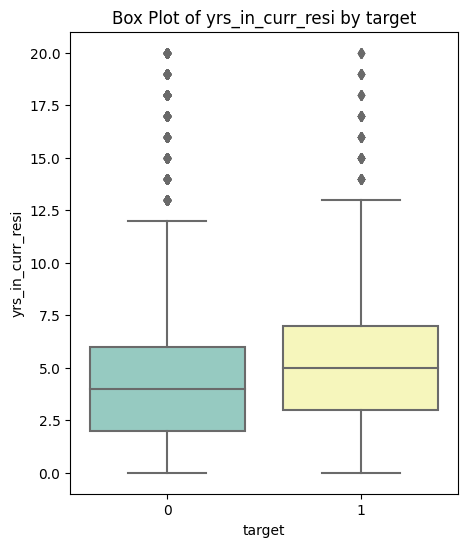

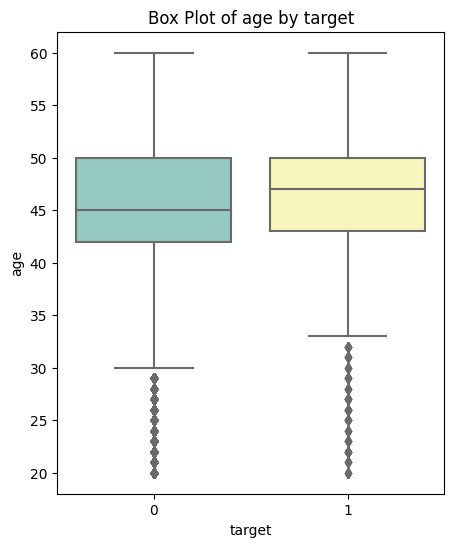

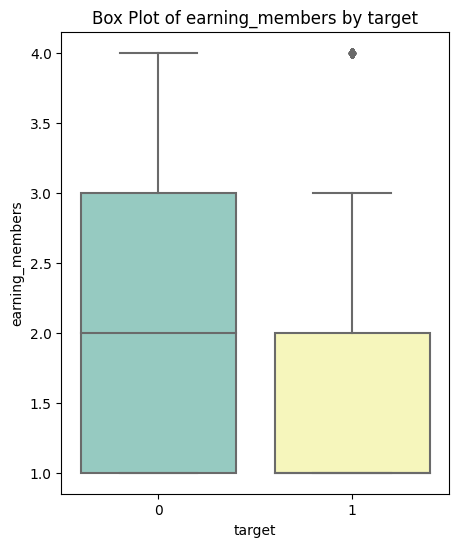

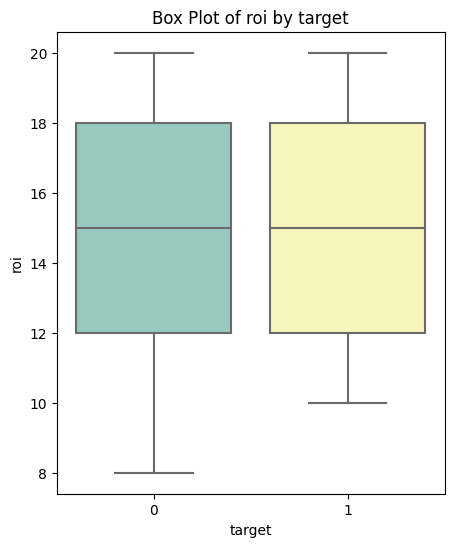

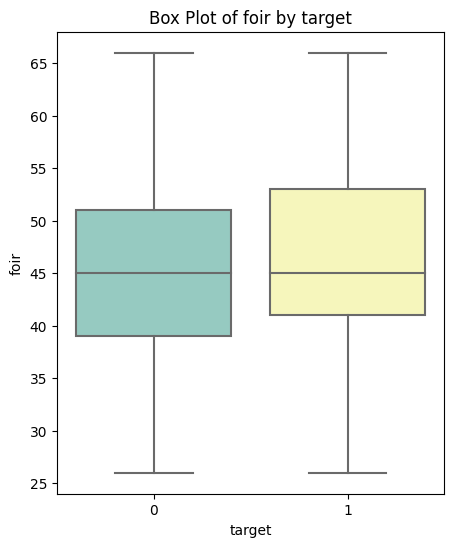

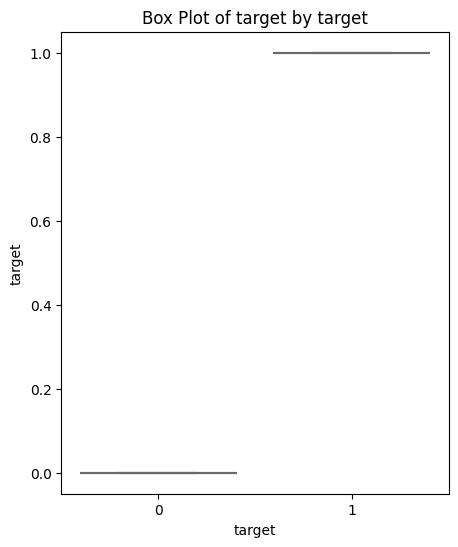

In [32]:
for col in new_df.columns:    
    plt.figure(figsize=(5, 6))
    sns.boxplot(data=new_df, x='target', y=col, palette="Set3")  # If you have a category column
    # Or, if you want to plot a single column without grouping:
#     sns.boxplot(y=df[col], palette="Set3")
    
    plt.title(f"Box Plot of {col} by target")
    plt.xlabel("target")
    plt.ylabel(f"{col}")
    plt.show()

Outliers--> disb_amt, vin_in_business, down_payment, asset_cost, yrs_in_curr_resi, age, earning_members

### WOE Transformation

In [33]:
df_woe = new_df.copy()

# Loop through each feature and substitute WOE values
for feature, woe_df in feature_df.items():
    # Get the WOE map for this feature
    woe_map = dict(zip(woe_df.index, woe_df['woe']))
    if feature in new_df.columns:

        # Check if the feature is continuous (has been binned) or categorical
        if feature + '_binned' in dev.columns:
            # Continuous: map WOE using binned column
            binned_feature = feature + '_binned'
            df_woe[feature] = dev[binned_feature].map(woe_map)
        else:
            # Categorical: map WOE directly on the original column
            df_woe[feature] = dev[feature].map(woe_map)

# Display the WOE-substituted DataFrame
print("DataFrame with WOE-substituted values:")
df_woe.head()

DataFrame with WOE-substituted values:


ltv  disb_amt vin_in_business  down_payment dist_from_off  asset_cost  \
0 -0.286088 -0.265407        0.016742      0.079022     -0.063234    0.259548   
1  0.561765  0.259548       -0.469665     -0.017021      0.145695    0.112905   
2  0.058249 -0.406486        0.273758      0.574343     -0.072867   -0.047345   
3 -0.578603  0.014115       -0.105381     -0.406486     -0.138222   -0.105732   
4 -0.005863  0.079022        0.566375     -0.017021      0.284602    0.014115   

     tenure yrs_in_curr_resi       age earning_members       roi      foir  \
0 -0.300534        -0.353589 -0.074352        0.576999 -0.024215 -0.018646   
1  0.085412        -0.075575 -0.186933       -0.050027 -0.058179 -0.018646   
2  0.357135        -0.075575  0.107003       -0.060547  0.104340  0.028628   
3 -0.219023        -0.029082 -0.017521       -0.060547  0.104340 -0.018646   
4 -0.062109        -0.075575  0.167274       -0.060547  0.182535 -0.021980   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [34]:
df_woe.dropna(inplace = True)

In [35]:
for col in df_woe.select_dtypes(include='category').columns:
    df_woe[col]= df_woe[col].astype('float')


In [36]:
df_woe.shape

(10000, 13)

In [37]:
# new_df["age"].head(30)

#### Checking VIF score after woe transformation

In [38]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_woe), columns=df_woe.columns)

# Calculating VIF for each variable
vif_data_woe = pd.DataFrame()
vif_data_woe["Variable"] = df_scaled.columns
vif_data_woe["VIF"] = [variance_inflation_factor(df_scaled.values, i) for i in range(df_scaled.shape[1])]

# Display VIF scores
print(vif_data_woe)

            Variable       VIF
0                ltv  2.554058
1           disb_amt  1.974777
2    vin_in_business  1.436324
3       down_payment  1.945676
4      dist_from_off  1.209525
5         asset_cost  1.579964
6             tenure  1.109349
7   yrs_in_curr_resi  1.430368
8                age  1.698288
9    earning_members  1.374403
10               roi  1.398815
11              foir  1.004034
12            target  1.056419


In [39]:
# df_woe.info()

In [40]:
df_woe.head()

ltv  disb_amt  vin_in_business  down_payment  dist_from_off  \
0 -0.286088 -0.265407         0.016742      0.079022      -0.063234   
1  0.561765  0.259548        -0.469665     -0.017021       0.145695   
2  0.058249 -0.406486         0.273758      0.574343      -0.072867   
3 -0.578603  0.014115        -0.105381     -0.406486      -0.138222   
4 -0.005863  0.079022         0.566375     -0.017021       0.284602   

   asset_cost    tenure  yrs_in_curr_resi       age  earning_members  \
0    0.259548 -0.300534         -0.353589 -0.074352         0.576999   
1    0.112905  0.085412         -0.075575 -0.186933        -0.050027   
2   -0.047345  0.357135         -0.075575  0.107003        -0.060547   
3   -0.105732 -0.219023         -0.029082 -0.017521        -0.060547   
4    0.014115 -0.062109         -0.075575  0.167274        -0.060547   

        roi      foir  target  
0 -0.024215 -0.018646       0  
1 -0.058179 -0.018646       0  
2  0.104340  0.028628       0  
3  0.104340 -0.018646       0  
4  0.182535 -0.021980       0

In [41]:
x_train = df_woe.drop('target', axis=1)
y_train = df_woe['target']

#### WOE transformation of validation data

In [42]:
# Function to apply WOE transformation based on training WOE values
def apply_woe_transformation(data, woe_mappings):

    data_woe = data[new_df.columns].copy()
    
    for feature, woe_df in woe_mappings.items():
        # Get WOE mapping for this feature from training data
        woe_dict = dict(zip(woe_df.index, woe_df['woe']))
        if feature in data_woe.columns:
        # Apply WOE values to corresponding bins in the test set
            data_woe[feature] = data[feature].map(woe_dict)
    data_woe.dropna(inplace=True)
    return data_woe

# Example usage
# Assuming 'woe_mappings' contains WOE mappings for each feature
# woe_mappings = {'feature1': woe_iv_df1, 'feature2': woe_iv_df2, ...}

val_woe = apply_woe_transformation(val, feature_df)


In [43]:
val_woe['target'].sum()

427

In [44]:
val_woe.isnull().sum()

ltv                 0
disb_amt            0
vin_in_business     0
down_payment        0
dist_from_off       0
asset_cost          0
tenure              0
yrs_in_curr_resi    0
age                 0
earning_members     0
roi                 0
foir                0
target              0
dtype: int64

In [45]:
val_woe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5996 entries, 4394 to 7563
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ltv               5996 non-null   float64
 1   disb_amt          5996 non-null   float64
 2   vin_in_business   5996 non-null   float64
 3   down_payment      5996 non-null   float64
 4   dist_from_off     5996 non-null   float64
 5   asset_cost        5996 non-null   float64
 6   tenure            5996 non-null   float64
 7   yrs_in_curr_resi  5996 non-null   float64
 8   age               5996 non-null   float64
 9   earning_members   5996 non-null   float64
 10  roi               5996 non-null   float64
 11  foir              5996 non-null   float64
 12  target            5996 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 655.8 KB


In [46]:
val_woe.head()

ltv  disb_amt  vin_in_business  down_payment  dist_from_off  \
4394   0.688416  0.340728         1.051267      0.340728      -0.320830   
18882  0.249584  0.340728        -0.301125     -0.047345      -0.138222   
14936  1.441844  0.523468         0.317914      0.574343       0.070438   
978   -0.286088  0.428312         0.016742      0.112905       0.029837   
8235   1.083605  0.943441         1.500113      0.079022      -0.138222   

       asset_cost    tenure  yrs_in_curr_resi       age  earning_members  \
4394     0.046111  0.070438         -0.029082  0.167274        -0.060547   
18882   -0.290076 -0.219023         -0.354710 -0.110070         0.576999   
14936   -0.214511  0.357135          0.189266 -0.017521        -0.060547   
978      0.046111 -0.300534          0.189266 -0.017521        -0.060547   
8235     0.574343  0.439961          0.168265  0.167274        -0.060547   

            roi      foir  target  
4394   0.182535 -0.139857       0  
18882 -0.119638 -0.101592       0  
14936 -0.058179  0.028628       0  
978   -0.243785 -0.021980       0  
8235   0.211517 -0.112695       0

In [47]:
x_test = val_woe.drop('target', axis=1)
y_test = val_woe['target'].to_numpy()

In [48]:
x_test.shape

(5996, 12)

In [49]:
y_test.shape

(5996,)

### SMOTE

In [50]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

In [51]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)


In [52]:
x_train_scaled.head()

ltv  disb_amt  vin_in_business  down_payment  dist_from_off  \
0 -0.687944 -0.757990        -0.166160     -0.016505      -0.328944   
1  0.600075  0.319579        -1.096609     -0.219519       0.242982   
2 -0.164844 -1.047580         0.325487      1.030498      -0.355313   
3 -1.132321 -0.184219        -0.399769     -1.042764      -0.534217   
4 -0.262240 -0.050984         0.885236     -0.219519       0.623227   

   asset_cost    tenure  yrs_in_curr_resi       age  earning_members  \
0    0.808139 -1.231555         -1.997657 -0.519552         2.736166   
1    0.284797  0.203948         -0.490794 -1.198658        -0.322346   
2   -0.287107  1.214606         -0.490794  0.574409        -0.373660   
3   -0.495479 -0.928380         -0.238798 -0.176740        -0.373660   
4   -0.067769 -0.344745         -0.490794  0.937977        -0.373660   

        roi      foir  
0 -0.227069 -0.180111  
1 -0.455171 -0.180111  
2  0.636312  0.091713  
3  0.636312 -0.180111  
4  1.161471 -0.199282

In [53]:
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train_scaled, y_train)

In [54]:
y_resampled.shape

(18622,)

In [55]:
x_resampled.head()

ltv  disb_amt  vin_in_business  down_payment  dist_from_off  \
0 -0.687944 -0.757990        -0.166160     -0.016505      -0.328944   
1  0.600075  0.319579        -1.096609     -0.219519       0.242982   
2 -0.164844 -1.047580         0.325487      1.030498      -0.355313   
3 -1.132321 -0.184219        -0.399769     -1.042764      -0.534217   
4 -0.262240 -0.050984         0.885236     -0.219519       0.623227   

   asset_cost    tenure  yrs_in_curr_resi       age  earning_members  \
0    0.808139 -1.231555         -1.997657 -0.519552         2.736166   
1    0.284797  0.203948         -0.490794 -1.198658        -0.322346   
2   -0.287107  1.214606         -0.490794  0.574409        -0.373660   
3   -0.495479 -0.928380         -0.238798 -0.176740        -0.373660   
4   -0.067769 -0.344745         -0.490794  0.937977        -0.373660   

        roi      foir  
0 -0.227069 -0.180111  
1 -0.455171 -0.180111  
2  0.636312  0.091713  
3  0.636312 -0.180111  
4  1.161471 -0.199282

## Model Building

In [56]:
log_reg = LogisticRegression()
log_reg.fit(x_resampled,y_resampled)

LogisticRegression()

In [57]:
# y_pred = log_reg.predict(x_test)
# y_pred

In [58]:
y_proba = log_reg.predict_proba(x_test)[:,1]
y_proba

array([0.22622509, 0.38187161, 0.19380752, ..., 0.27888591, 0.39710618,
       0.38768331])

In [59]:
y_proba.shape

(5996,)

In [60]:
# Selected probability threshold as 0.43 by reference of the Decile Analysis.
y_pred = (y_proba > 0.43).astype(int)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

# Model evaluation

In [61]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.7501667778519012
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.77      0.85      5569
           1       0.14      0.50      0.22       427

    accuracy                           0.75      5996
   macro avg       0.55      0.64      0.54      5996
weighted avg       0.89      0.75      0.81      5996



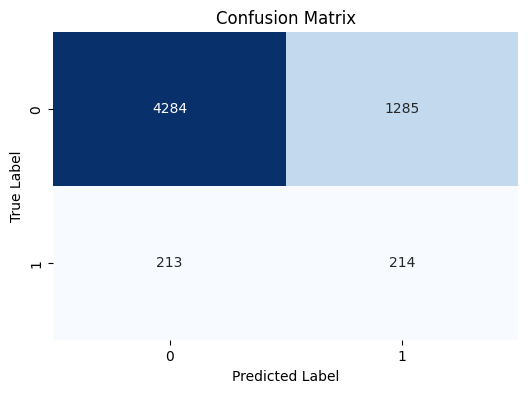

In [62]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('confusion_mt.png')
plt.show()

### Decile Analysis

In [63]:

def decile_analysis(predicted_prob, actual_target):
    # Create a DataFrame to store the results
    df = pd.DataFrame({'predicted_prob': predicted_prob, 'actual_target': actual_target})
    
    # Sort by predicted probability in descending order
    df = df.sort_values(by='predicted_prob', ascending=False).reset_index(drop=True)
    
    # Assign each row to a decile
    df['decile'] = pd.qcut(df.index + 1, 10, labels=range(1, 11))
    
    # Group by decile and calculate metrics
    decile_df = df.groupby('decile').apply(
        lambda x: pd.Series({
            'No. of customers': len(x),
            'Defaulters': x['actual_target'].sum(),
            'Default Rate': x['actual_target'].mean() * 100,  # In percentage
            'Probability Range': f"{x['predicted_prob'].min():.2f}-{x['predicted_prob'].max():.2f}"
        })
    ).reset_index()

    # Calculate cumulative metrics and lift
    decile_df['Cumulative Customers'] = decile_df['No. of customers'].cumsum()
    decile_df['Cumulative % of customers'] = (decile_df['Cumulative Customers'] / decile_df['No. of customers'].sum()) * 100
    decile_df['% of Defaulters'] = (decile_df['Defaulters'] / decile_df['Defaulters'].sum()) * 100
    decile_df['Cumulative Defaulters'] = decile_df['Defaulters'].cumsum()
    decile_df['Cumulative % of Defaulters or Gain'] = (decile_df['Cumulative Defaulters'] / decile_df['Defaulters'].sum()) * 100
    decile_df['Lift'] = decile_df['Default Rate'] / (df['actual_target'].mean() * 100)  # Compare with overall response rate

    # Round values for cleaner presentation
    decile_df = decile_df.round(2)

    return decile_df

# Assuming `y_proba` is the predicted probabilities and `y_test` is the actual target in the test set
# Replace y_proba and y_test with your actual variables
decile_table = decile_analysis(y_proba, y_test)
print(decile_table)


  decile  No. of customers  Defaulters  Default Rate Probability Range  \
0      1               600         104         17.33         0.50-0.69   
1      2               600          77         12.83         0.45-0.50   
2      3               599          56          9.35         0.41-0.45   
3      4               600          39          6.50         0.38-0.41   
4      5               599          38          6.34         0.35-0.38   
5      6               600          38          6.33         0.31-0.35   
6      7               599          25          4.17         0.28-0.31   
7      8               600          16          2.67         0.24-0.28   
8      9               599          19          3.17         0.20-0.24   
9     10               600          15          2.50         0.07-0.20   

   Cumulative Customers  Cumulative % of customers  % of Defaulters  \
0                   600                      10.01            24.36   
1                  1200                    

### Gain and Lift Chart

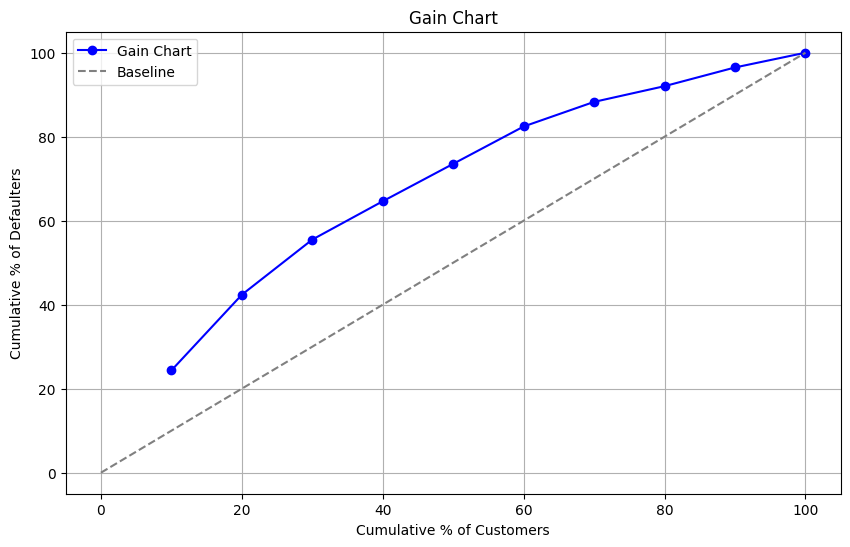

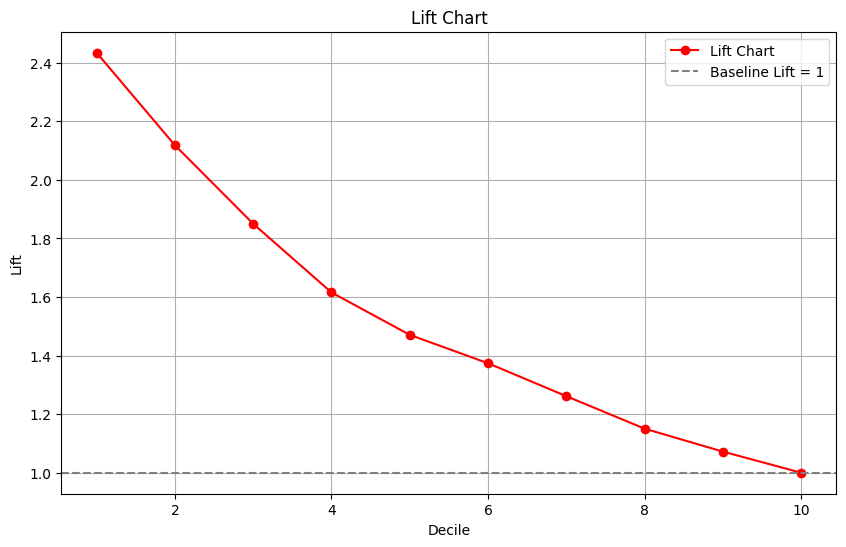

In [64]:

def lift_gain_chart(predicted_prob, actual_target, n_bins=10):
    # Create a DataFrame to store predicted probabilities and actual target values
    df = pd.DataFrame({'predicted_prob': predicted_prob, 'actual_target': actual_target})
    
    # Sort by predicted probabilities in descending order
    df = df.sort_values(by='predicted_prob', ascending=False).reset_index(drop=True)
    
    # Create deciles based on the sorted probabilities
    df['decile'] = pd.qcut(df.index + 1, n_bins, labels=range(1, n_bins + 1))
    
    # Calculate metrics by decile
    decile_df = df.groupby('decile').apply(
        lambda x: pd.Series({
            'No. of customers': len(x),
            'Defaulters': x['actual_target'].sum(),
        })
    ).reset_index()
    
    # Calculate cumulative gains and lift
    decile_df['Cumulative Defaulters'] = decile_df['Defaulters'].cumsum()
    decile_df['Cumulative % of Defaulters'] = decile_df['Cumulative Defaulters'] / decile_df['Defaulters'].sum() * 100
    decile_df['Cumulative % of Customers'] = decile_df['No. of customers'].cumsum() / decile_df['No. of customers'].sum() * 100
    decile_df['Lift'] = decile_df['Cumulative % of Defaulters'] / decile_df['Cumulative % of Customers']
    
    # Plot the Gain Chart
    plt.figure(figsize=(10, 6))
    plt.plot(decile_df['Cumulative % of Customers'], decile_df['Cumulative % of Defaulters'], marker='o', color='b', label='Gain Chart')
    plt.plot([0, 100], [0, 100], linestyle='--', color='gray', label='Baseline')
    plt.xlabel('Cumulative % of Customers')
    plt.ylabel('Cumulative % of Defaulters')
    plt.title('Gain Chart')
    plt.legend()
    plt.grid(True)
    plt.savefig('Gain.png')
    plt.show()
    
    # Plot the Lift Chart
    plt.figure(figsize=(10, 6))
    plt.plot(decile_df['decile'], decile_df['Lift'], marker='o', color='r', label='Lift Chart')
    plt.axhline(y=1, color='gray', linestyle='--', label='Baseline Lift = 1')
    plt.xlabel('Decile')
    plt.ylabel('Lift')
    plt.title('Lift Chart')
    plt.legend()
    plt.grid(True)
    plt.savefig("Lift.png")
    plt.show()

# `y_proba` is the predicted probabilities and `y_test` is the actual target in the test set
# Replace y_proba and y_test with your actual variables
lift_gain_chart(y_proba, y_test)


### KS Score and Gini Score

In [65]:

def ks_gini_score(y_true, y_pred_proba):
    # KS Score Calculation
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    ks_score = max(tpr - fpr)  # KS statistic is the max difference between TPR and FPR
    
    # Gini Score Calculation
    auc = roc_auc_score(y_true, y_pred_proba)
    gini_score = 2 * auc - 1  # Gini coefficient formula

    print(f"KS Score: {ks_score:.4f}")
    print(f"Gini Score: {gini_score:.4f}")

    return ks_score, gini_score

# y_test is the true labels and y_proba are the predicted probabilities
# Replace y_test and y_pred_proba with your actual data
ks_score, gini_score = ks_gini_score(y_test, y_proba)


KS Score: 0.2829
Gini Score: 0.3731


### ROC_AUC curve

In [66]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Create ROC curve plotly figure
fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name='ROC curve (area = %0.2f)' % roc_auc))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', line=dict(dash='dash'), name='Random Guess'))

# Update layout
fig.update_layout(
    title='Receiver Operating Characteristic (ROC)',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    legend=dict(x=0.05, y=0.95),
    margin=dict(l=20, r=20, t=60, b=20),
    hovermode='closest'
)

# Show plot
fig.show()

# Score calculation

In [67]:
logit_values = log_reg.decision_function(x_test)
logit_values

array([-1.22975052, -0.48161172, -1.42545702, ..., -0.94999461,
       -0.41753738, -0.4570608 ])

In [68]:
log_odds = log_reg.intercept_ + np.dot(x_test, log_reg.coef_.T)

In [69]:
log_odds

array([[-1.22975052],
       [-0.48161172],
       [-1.42545702],
       ...,
       [-0.94999461],
       [-0.41753738],
       [-0.4570608 ]])

In [70]:
# Parameters for score calculation
offset = 600  
PDO = 20              

# Factor calculation
factor = PDO / np.log(2)

# Function to calculate the score based on log-odds
def calculate_score(model, X, offset=offset, factor=factor):
    # Calculate log-odds
    log_odds = model.intercept_ + np.dot(X, model.coef_.T)
    
    # Convert log-odds to score
    score = offset + (log_odds * factor)
    score = np.round(score).astype(int) 
    return score

# X_test is the test dataset with WOE-transformed features
# and `model` is the trained logistic regression model
scores = calculate_score(log_reg, x_test)

# Convert scores to a DataFrame for easy analysis and review
score_df = pd.DataFrame({'Score': scores.flatten()})
print(score_df.head())

# Optionally, save the scores to an Excel file
# score_df.to_excel('calculated_scores.xlsx', index=False)


   Score
0    565
1    586
2    559
3    587
4    548


In [71]:
sum(score_df['Score']>600)

545

# Profitability in Business

In [72]:
# val.head()

In [73]:
before_model=pd.DataFrame(val['disb_amt']*val['roi']/100, columns=['interest_inc'])
before_model['total_amt']=val['disb_amt']*(100+val['roi'])/100   # Principal + Interest amount

In [74]:
profit_cal=pd.concat([before_model,val[['disb_amt','roi']]], axis=1)

In [75]:
y_test1 = pd.Series(y_test, index=profit_cal.index[:len(y_test)])
profit_cal['target']=y_test1.reindex(profit_cal.index)
profit_cal.dropna(inplace=True)
profit_cal['target'] = profit_cal['target'].astype('int64')

In [76]:
profit_cal.head()

interest_inc  total_amt  disb_amt  roi  target
4394       89843.21  562702.21    472859   19       0
18882      92748.12  865649.12    772901   12       0
14936      99914.70  766012.70    666098   15       0
978        72194.10  794135.10    721941   10       0
8235       36517.50  239392.50    202875   18       0

In [77]:
profit_cal.shape

(5996, 5)

In [78]:
print("Total disburesment amount:", profit_cal['disb_amt'].sum())
print("Total expected interest amount:", profit_cal['interest_inc'].sum())
print("Total amount should be recovered:", profit_cal['total_amt'].sum()) # principal + interest

Total disburesment amount: 4712881161
Total expected interest amount: 714859647.75
Total amount should be recovered: 5427740808.75


### Profit calculation before applying model

In [79]:
print("Total Non-Defaulted interest income:", profit_cal[profit_cal['target']==0]['interest_inc'].sum() )
print("Yet to recover interest amount:", profit_cal['interest_inc'].sum() - profit_cal[profit_cal['target']==0]['interest_inc'].sum() )
# Assuming the extream case where the defaulted amount is disbursment amount
woi = profit_cal[profit_cal['target']==1]['disb_amt'].sum() # Only Principal (Without interest)
print("Total Defaulted disbursment amount:", woi) 
# principal + interest for defaulted customers
wi = profit_cal[profit_cal['target']==1]['interest_inc'].sum() + profit_cal[profit_cal['target']==1]['disb_amt'].sum() # with interest
print("Total Defaulted amount should be recovered:", wi) 

Total Non-Defaulted interest income: 661866676.87
Yet to recover interest amount: 52992970.879999995
Total Defaulted disbursment amount: 347270603
Total Defaulted amount should be recovered: 400263573.88


In [80]:
profit_b_model_woi = profit_cal[profit_cal['target']==0]['interest_inc'].sum() - woi

In [81]:
profit_b_model_wi = profit_cal[profit_cal['target']==0]['interest_inc'].sum() - wi

In [82]:
print("Total profit before applying model (excluding interest):", profit_b_model_woi)
print("Total profit before applying model (including interest):", profit_b_model_wi)

Total profit before applying model (excluding interest): 314596073.87
Total profit before applying model (including interest): 261603102.99


In [83]:
print("Percentage of profit on investment - ROI (excluding interest):", (profit_b_model_woi/profit_cal['disb_amt'].sum())*100, "%")
print("Percentage of profit on investment - ROI (including interest):", (profit_b_model_wi/profit_cal['disb_amt'].sum())*100, "%")

Percentage of profit on investment - ROI (excluding interest): 6.675238842713522 %
Percentage of profit on investment - ROI (including interest): 5.5508105138490675 %


### Profit calculation after applying model

In [84]:
y_predicted = pd.Series(y_pred, index=profit_cal.index[:len(y_pred)])
profit_cal['predicted'] = y_predicted.reindex(profit_cal.index)
profit_cal['predicted']=profit_cal['predicted'].astype('int64')

In [85]:
profit_cal['Category'] = None
profit_cal.loc[(profit_cal['target'] == 1) & (profit_cal['predicted'] ==1), 'Category'] = 'TP'
profit_cal.loc[(profit_cal['target'] == 0) & (profit_cal['predicted'] ==0), 'Category'] = 'TN'
profit_cal.loc[(profit_cal['target'] == 0) & (profit_cal['predicted'] ==1), 'Category'] = 'FP'
profit_cal.loc[(profit_cal['target'] == 1) & (profit_cal['predicted'] ==0), 'Category'] = 'FN'

In [86]:
profit_cal.head()

interest_inc  total_amt  disb_amt  roi  target  predicted Category
4394       89843.21  562702.21    472859   19       0          0       TN
18882      92748.12  865649.12    772901   12       0          0       TN
14936      99914.70  766012.70    666098   15       0          0       TN
978        72194.10  794135.10    721941   10       0          0       TN
8235       36517.50  239392.50    202875   18       0          0       TN

In [87]:
profit_cal['Category'].value_counts()

TN    4284
FP    1285
TP     214
FN     213
Name: Category, dtype: int64

###### Without defaulter interest calculation

In [88]:
TN_in = profit_cal[profit_cal['Category']=='TN']['interest_inc'].sum()
TP_in = profit_cal[profit_cal['Category']=='TP']['disb_amt'].sum() 
FN_out = profit_cal[profit_cal['Category']=='FN']['disb_amt'].sum() 
FP_out = profit_cal[profit_cal['Category']=='FP']['interest_inc'].sum() 

In [89]:
print("Total incoming interest from truly identified non-defaulters:", TN_in)
print("Profit from truly identifying defaulters (excluding interest):", TP_in)
print("Loss from fail to identify defaulters (excluding interest):", FN_out)
print("Loss incurring from fail to identify non_defaulters:", FP_out)

Total incoming interest from truly identified non-defaulters: 499509328.51
Profit from truly identifying defaulters (excluding interest): 176496698
Loss from fail to identify defaulters (excluding interest): 170773905
Loss incurring from fail to identify non_defaulters: 162357348.36


###### With defaulter interest calculation

In [90]:
TP_in_wi = profit_cal[profit_cal['Category']=='TP']['interest_inc'].sum() + TP_in
FN_out_wi = profit_cal[profit_cal['Category']=='FN']['interest_inc'].sum() + FN_out
print("Profit from truly identifying defaulters (including interest):", TP_in_wi)
print("Loss from fail to identify defaulters (including interest):", FN_out_wi)

Profit from truly identifying defaulters (including interest): 203530674.07999998
Loss from fail to identify defaulters (including interest): 196732899.8


In [91]:
profit_a_model_woi = TN_in + TP_in - FN_out - FP_out  # Without interest

In [92]:
profit_a_model_wi = TN_in + TP_in_wi - FN_out_wi - FP_out  # With interest

In [93]:
print("Total profit after applying model (excluding interest):", profit_a_model_woi)
print("Total profit after applying model (including interest):", profit_a_model_wi)

Total profit after applying model (excluding interest): 342874773.15
Total profit after applying model (including interest): 343949754.4299999


In [94]:
print("Percentage of profit on investment - ROI (excluding interest):", (profit_a_model_woi/profit_cal['disb_amt'].sum())*100, "%")
print("Percentage of profit on investment - ROI (including interest):", (profit_a_model_wi/profit_cal['disb_amt'].sum())*100, "%")

Percentage of profit on investment - ROI (excluding interest): 7.275268809817545 %
Percentage of profit on investment - ROI (including interest): 7.29807823876932 %


### NET PROFIT

In [95]:
net_profit_woi = profit_a_model_woi - profit_b_model_woi

In [96]:
net_profit_wi = profit_a_model_wi - profit_b_model_wi

In [97]:
print("NET PROFIT (excluding interest):", net_profit_woi)
print("NET PROFIT (including interest):", net_profit_wi)

NET PROFIT (excluding interest): 28278699.27999997
NET PROFIT (including interest): 82346651.43999988


### Worth of the Model

In [98]:
print('Percentage of growth in business (excluding interest):', (net_profit_woi/profit_b_model_woi)*100,"%")
print('Percentage of growth in business (including interest):', (net_profit_wi/profit_b_model_wi)*100,"%")

Percentage of growth in business (excluding interest): 8.98889135268914 %
Percentage of growth in business (including interest): 31.477704392194326 %
